# Inteligencia Artificial - Modelos

### Grupo 3: 

Crishina Ruiz - Jinghao Wang - Roberto Echevarria 

## Descripcion:

Para la actividad 4 de la asignatura de inteligencia artifical, hemos decidido desarrollar nuestra actividad en torno a las enfermedades cardíacas. Para esto hemos seleccionado un dataset que nos da información sobre los indicadores que pueden predecirnos una enfermedad del corazón.

<img src='logo.jpg' width='700' height='500' align='center'/>

Estas son las diferentes columnas que hay en nuestro dataset:

- HeartDisease -> Enfermedades del corazón (anteriormente si o no)
- BMI -> Índice de masa corporal, mide el contenido de grasa corporal en relación a la estatura y el peso
- Smoking -> Persona fumadora (si o no)
- AlcoholDrinking -> Persona que consume alcohol (si o no)
- Stroke -> Persona con obstruccion en artería (si o no)
- PhysicalHealth -> Salud física (calculada)
- MentalHealth -> Salud mental (calculada)
- DiffWalking -> Persona que sale a andar (si o no)
- Sex -> Sexo de la persona
- AgeCategory -> Edad de la persona
- Diabetic -> Persona diabética (si o no)
- PhysicalActivity -> Actividad física (si o no)
- GenHealth -> Salud general de la persona
- SleepTime -> Horas de sueño (en semana laboral 5 dias aproximadamente)
- Asthma -> Persona con asma (si o no)
- KidneyDisease -> Enfermedades en el riñón (anteriormente si o no)
- SkinCancer -> Persona con cáncer de piel (si o no)

# Desarrollo:

Importamos las librerías necesarias:

In [1]:
import pandas as pd
import numpy as np
import sys
import time
import json
import pymongo
from pymongo import MongoClient
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings

#prediccion para los modelos
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.datasets import load_breast_cancer

try:
    import eli5
except ModuleNotFoundError:
    !pip install eli5
    import eli5
from eli5.sklearn import PermutationImportance
try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    import shap


## Carga y tratamiento de Datos

Cargamos el dataset con todos los datos que vamos a utilizar:

In [2]:
df = pd.read_csv('datasetActividad3.csv', sep=";")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,2625,No,No,No,30,0,No,Male,21,White,No,Yes,Very good,80,No,No,No
1,No,2585,No,No,No,0,10,No,Female,21,Hispanic,No,Yes,Excellent,60,No,No,No
2,No,275,No,No,No,50,60,No,Male,21,White,No,Yes,Excellent,80,No,No,No
3,No,439,No,No,No,20,40,No,Female,21,Black,Yes,No,Fair,70,No,No,No
4,No,2362,No,No,No,0,0,No,Female,21,White,No,Yes,Excellent,80,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,No,2344,No,No,No,0,0,No,Female,80,Hispanic,No,Yes,Very good,70,No,No,No
319791,No,2954,Yes,No,No,0,0,No,Male,80,Hispanic,Yes,No,Good,80,No,No,No
319792,No,2561,No,No,No,0,0,Yes,Male,80,Hispanic,No,No,Very good,80,No,No,No
319793,No,2694,No,No,No,0,0,No,Female,80,Hispanic,Yes,No,Fair,90,No,No,No


Eliminamos las columnas que no nos interesan y todas las filas en las que falte algún dato:

In [3]:
df = df.drop(['Race'], axis = 1)
df = df.dropna()
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,2625,No,No,No,30,0,No,Male,21,No,Yes,Very good,80,No,No,No
1,No,2585,No,No,No,0,10,No,Female,21,No,Yes,Excellent,60,No,No,No
2,No,275,No,No,No,50,60,No,Male,21,No,Yes,Excellent,80,No,No,No
3,No,439,No,No,No,20,40,No,Female,21,Yes,No,Fair,70,No,No,No
4,No,2362,No,No,No,0,0,No,Female,21,No,Yes,Excellent,80,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,No,2344,No,No,No,0,0,No,Female,80,No,Yes,Very good,70,No,No,No
319791,No,2954,Yes,No,No,0,0,No,Male,80,Yes,No,Good,80,No,No,No
319792,No,2561,No,No,No,0,0,Yes,Male,80,No,No,Very good,80,No,No,No
319793,No,2694,No,No,No,0,0,No,Female,80,Yes,No,Fair,90,No,No,No


Mostramos la información de todas las columnas de nuestro dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   BMI               319795 non-null  int64 
 2   Smoking           319795 non-null  object
 3   AlcoholDrinking   319795 non-null  object
 4   Stroke            319795 non-null  object
 5   PhysicalHealth    319795 non-null  int64 
 6   MentalHealth      319795 non-null  int64 
 7   DiffWalking       319795 non-null  object
 8   Sex               319795 non-null  object
 9   AgeCategory       319795 non-null  int64 
 10  Diabetic          319795 non-null  object
 11  PhysicalActivity  319795 non-null  object
 12  GenHealth         319795 non-null  object
 13  SleepTime         319795 non-null  int64 
 14  Asthma            319795 non-null  object
 15  KidneyDisease     319795 non-null  object
 16  SkinCancer        319795 non-null  obj

Sacamos los valores únicos(todos los valores quitando duplicados) de la columna GenHealth

In [5]:
df['GenHealth'].unique()
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,2625,No,No,No,30,0,No,Male,21,No,Yes,Very good,80,No,No,No
1,No,2585,No,No,No,0,10,No,Female,21,No,Yes,Excellent,60,No,No,No
2,No,275,No,No,No,50,60,No,Male,21,No,Yes,Excellent,80,No,No,No
3,No,439,No,No,No,20,40,No,Female,21,Yes,No,Fair,70,No,No,No
4,No,2362,No,No,No,0,0,No,Female,21,No,Yes,Excellent,80,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,No,2344,No,No,No,0,0,No,Female,80,No,Yes,Very good,70,No,No,No
319791,No,2954,Yes,No,No,0,0,No,Male,80,Yes,No,Good,80,No,No,No
319792,No,2561,No,No,No,0,0,Yes,Male,80,No,No,Very good,80,No,No,No
319793,No,2694,No,No,No,0,0,No,Female,80,Yes,No,Fair,90,No,No,No


Para mejor manejo de los datos hay que modificar sus valores de string y object a números ya sean enteros o decimales.
En la columna GenHealth asignamos valor 0 a Poor, 25 a Fair, 50 a Good, 75 a Very Good y 100 a Excellent.
Además en todas las columnas que tienen como valores únicamente YES o NO, las modificamos haciendo que NO sea 0 y YES sea 100, en el caso del sexo, hemos puesto female a 0 y male a 100.

In [6]:
df['GenHealth']=df['GenHealth'].replace('Poor',0)
df['GenHealth']=df['GenHealth'].replace('Fair',25)
df['GenHealth']=df['GenHealth'].replace('Good',50)
df['GenHealth']=df['GenHealth'].replace('Very good',75)
df['GenHealth']=df['GenHealth'].replace('Excellent',100)
df['GenHealth'].unique()

df['HeartDisease']=df['HeartDisease'].replace('No',0)
df['HeartDisease']=df['HeartDisease'].replace('Yes',100)

df['Smoking']=df['Smoking'].replace('No',0)
df['Smoking']=df['Smoking'].replace('Yes',100)

df['AlcoholDrinking']=df['AlcoholDrinking'].replace('No',0)
df['AlcoholDrinking']=df['AlcoholDrinking'].replace('Yes',100)

df['Stroke']=df['Stroke'].replace('No',0)
df['Stroke']=df['Stroke'].replace('Yes',100)

df['Diabetic']=df['Diabetic'].replace('No',0)
df['Diabetic']=df['Diabetic'].replace('No, borderline diabetes',0)
df['Diabetic']=df['Diabetic'].replace('Yes (during pregnancy)',100)
df['Diabetic']=df['Diabetic'].replace('Yes',100)

df['PhysicalActivity']=df['PhysicalActivity'].replace('No',0)
df['PhysicalActivity']=df['PhysicalActivity'].replace('Yes',100)

df['Asthma']=df['Asthma'].replace('No',0)
df['Asthma']=df['Asthma'].replace('Yes',100)

df['KidneyDisease']=df['KidneyDisease'].replace('No',0)
df['KidneyDisease']=df['KidneyDisease'].replace('Yes',100)

df['SkinCancer']=df['SkinCancer'].replace('No',0)
df['SkinCancer']=df['SkinCancer'].replace('Yes',100)

df['DiffWalking']=df['DiffWalking'].replace('No',0)
df['DiffWalking']=df['DiffWalking'].replace('Yes',100)

df['Sex']=df['Sex'].replace('Female',0)
df['Sex']=df['Sex'].replace('Male',100)

In [7]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,2625,0,0,0,30,0,0,100,21,0,100,75,80,0,0,0
1,0,2585,0,0,0,0,10,0,0,21,0,100,100,60,0,0,0
2,0,275,0,0,0,50,60,0,100,21,0,100,100,80,0,0,0
3,0,439,0,0,0,20,40,0,0,21,100,0,25,70,0,0,0
4,0,2362,0,0,0,0,0,0,0,21,0,100,100,80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0,2344,0,0,0,0,0,0,0,80,0,100,75,70,0,0,0
319791,0,2954,100,0,0,0,0,0,100,80,100,0,50,80,0,0,0
319792,0,2561,0,0,0,0,0,100,100,80,0,0,75,80,0,0,0
319793,0,2694,0,0,0,0,0,0,0,80,100,0,25,90,0,0,0


In [8]:
edadMinima = df['AgeCategory'].min()
edadMaxima = df['AgeCategory'].max()
print('Edad más baja: ' + str(edadMinima))
print('Edad más alta: ' + str(edadMaxima))

Edad más baja: 21
Edad más alta: 80


Reescalamos todo el dataset para que esté entre valores de 0 y 100 y podamos asi utilizar mejor los datos. Cabe destacar que en la columna de la edad en la cual la edad mínima era de 21 y la máxima de 80, ahora al reescalar entre 0 y 100 las personas con edad de 21 años tendrán un valor de 0 y las de 80 un valor de 100, esto pasa por redimensionar esta columna.

In [9]:
scaler = MinMaxScaler(feature_range=(0, 100))
df_norm = list(df.columns)
for col in df_norm:
    df[col]=df[col].astype(int)
    df[[col]]=scaler.fit_transform(df[[col]])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,26.732885,0.0,0.0,0.0,10.000000,0.000000,0.0,100.0,0.0,0.0,100.0,75.0,30.434783,0.0,0.0,0.0
1,0.0,26.305671,0.0,0.0,0.0,0.000000,3.333333,0.0,0.0,0.0,0.0,100.0,100.0,21.739130,0.0,0.0,0.0
2,0.0,1.634092,0.0,0.0,0.0,16.666667,20.000000,0.0,100.0,0.0,0.0,100.0,100.0,30.434783,0.0,0.0,0.0
3,0.0,3.385667,0.0,0.0,0.0,6.666667,13.333333,0.0,0.0,0.0,100.0,0.0,25.0,26.086957,0.0,0.0,0.0
4,0.0,23.923956,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,100.0,100.0,30.434783,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,23.731710,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,100.0,0.0,100.0,75.0,26.086957,0.0,0.0,0.0
319791,0.0,30.246716,100.0,0.0,0.0,0.000000,0.000000,0.0,100.0,100.0,100.0,0.0,50.0,30.434783,0.0,0.0,0.0
319792,0.0,26.049343,0.0,0.0,0.0,0.000000,0.000000,100.0,100.0,100.0,0.0,0.0,75.0,30.434783,0.0,0.0,0.0
319793,0.0,27.469828,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,100.0,100.0,0.0,25.0,34.782609,0.0,0.0,0.0


Mostramos la información de todas las columnas de nuestro dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  float64
 3   AlcoholDrinking   319795 non-null  float64
 4   Stroke            319795 non-null  float64
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  float64
 8   Sex               319795 non-null  float64
 9   AgeCategory       319795 non-null  float64
 10  Diabetic          319795 non-null  float64
 11  PhysicalActivity  319795 non-null  float64
 12  GenHealth         319795 non-null  float64
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  float64
 15  KidneyDisease     319795 non-null  float64
 16  SkinCancer        31

Mostramos todos los valores de las diferentes columnas en gráficas:

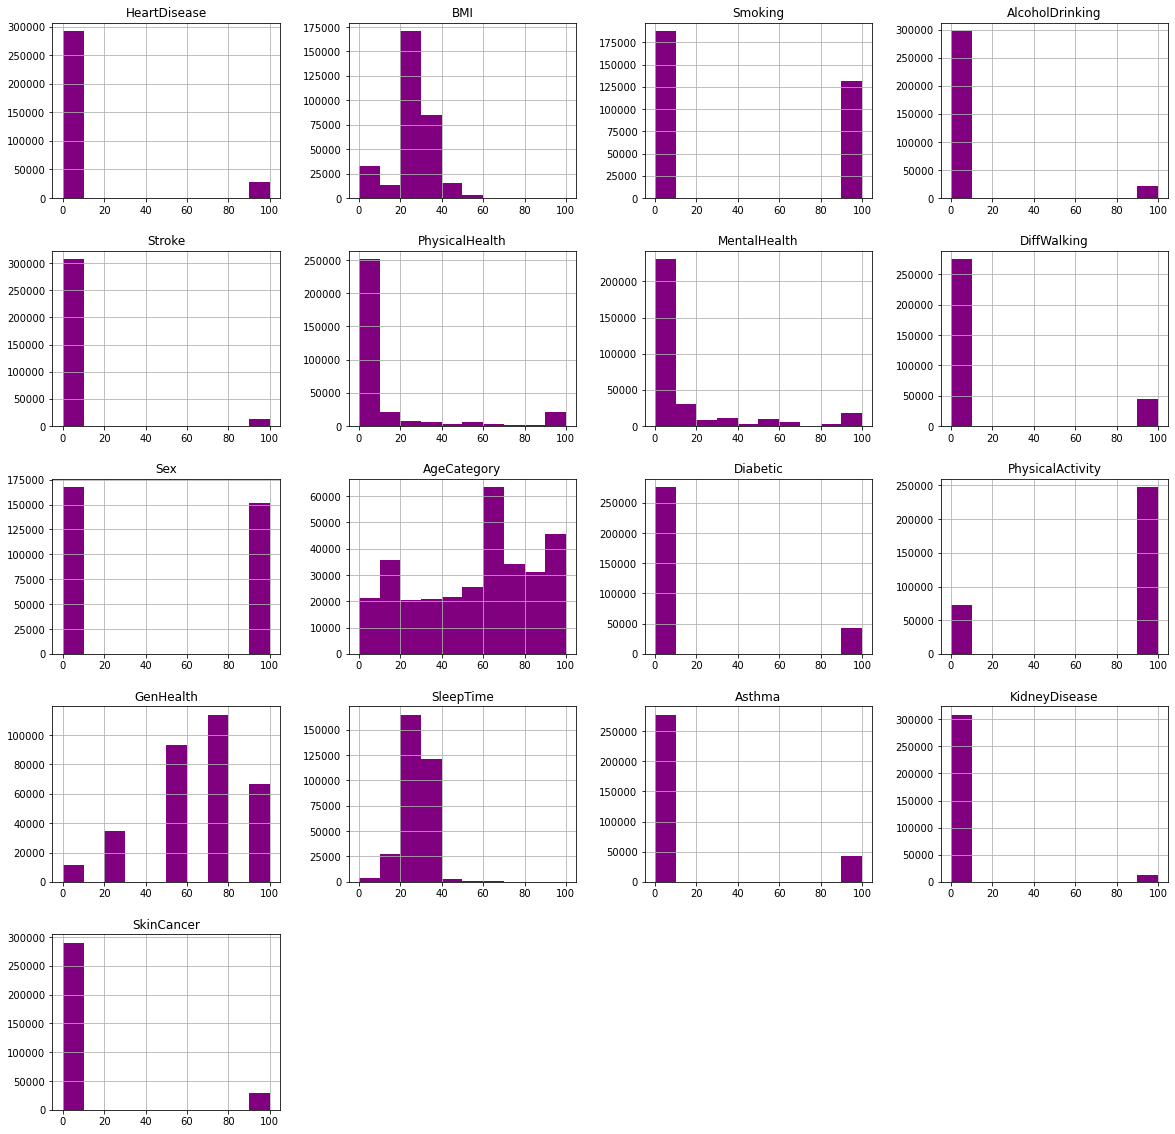

In [11]:
df.hist(figsize=(20,20),color='purple')
plt.show()

Aquí podemos ver una gráfica que nos muestra la densidad que estima al interrelacionar la variable del sexo con la de la edad, viendo en morado la gráfica de las mujeres y en azul la de los hombres todo ello frente a la edad.

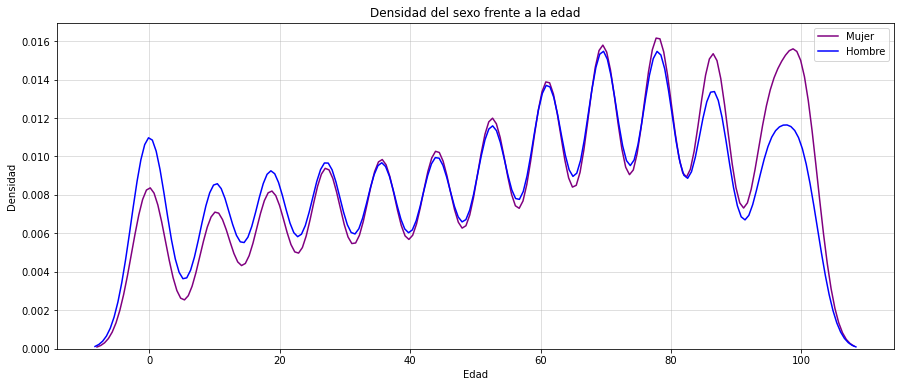

In [12]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Sex'] == 0, 'AgeCategory'], label = 'Mujer', color='purple')
sns.kdeplot(df.loc[df['Sex'] == 100, 'AgeCategory'], label = 'Hombre', color='blue')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Densidad del sexo frente a la edad');

Aquí podemos ver una gráfica que nos muestra la densidad que estima al interrelacionar la variable del sexo con la de la edad mental, viendo en morado la gráfica de las mujeres y en azul la de los hombres todo ello frente a la edad mental.

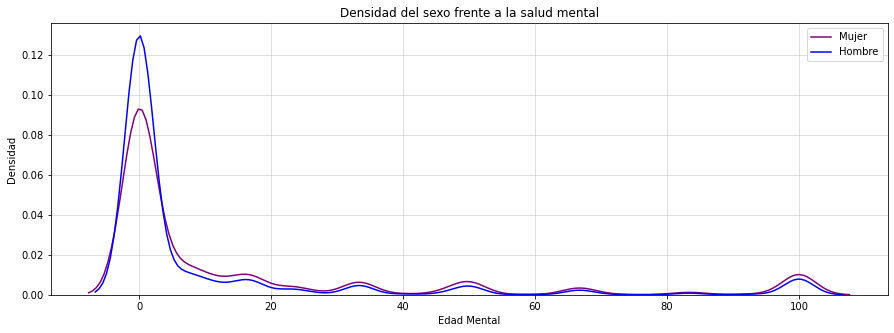

In [13]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Sex'] == 0, 'MentalHealth'], label = 'Mujer', color='purple')
sns.kdeplot(df.loc[df['Sex'] == 100, 'MentalHealth'], label = 'Hombre', color='blue')
plt.legend()
plt.xlabel('Edad Mental')
plt.ylabel('Densidad')
plt.title('Densidad del sexo frente a la salud mental');

Aquí podemos ver una gráfica que nos muestra la densidad que estima al interrelacionar la variable del salir a caminar con la del tiempo de sueño, viendo en morado la gráfica de salir a pasear y en azul la de no salir todo ello frente al tiempo de sueño.

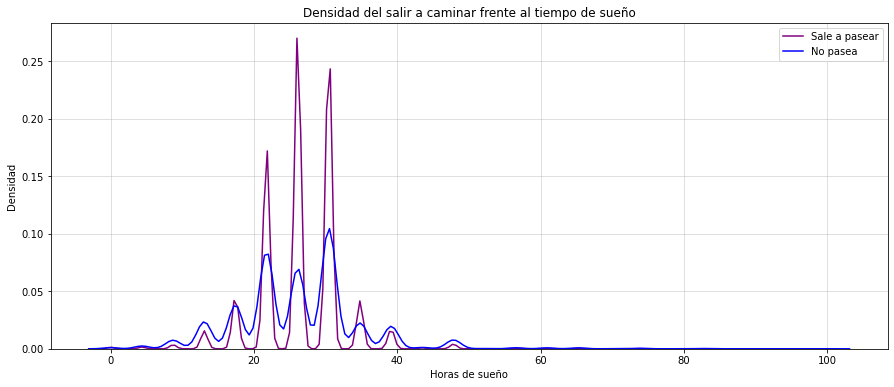

In [14]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['DiffWalking'] == 0, 'SleepTime'], label = 'Sale a pasear', color='purple')
sns.kdeplot(df.loc[df['DiffWalking'] == 100, 'SleepTime'], label = 'No pasea', color='blue')
plt.legend()
plt.xlabel('Horas de sueño')
plt.ylabel('Densidad')
plt.title('Densidad del salir a caminar frente al tiempo de sueño');

Aquí podemos ver una gráfica que nos muestra la densidad que estima al interrelacionar la variable de fumadores con la de la edad, viendo en morado la gráfica de los fumadores y en azul la de los no fumadores todo ello frente a la edad.

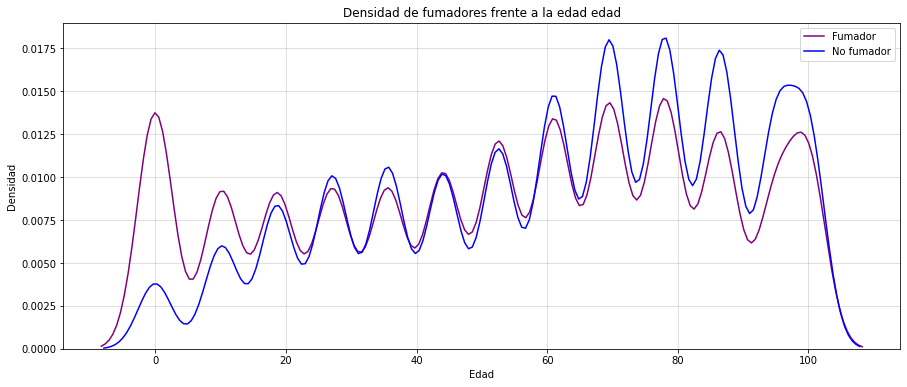

In [15]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Smoking'] == 0, 'AgeCategory'], label = 'Fumador', color='purple')
sns.kdeplot(df.loc[df['Smoking'] == 100, 'AgeCategory'], label = 'No fumador', color='blue')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Densidad de fumadores frente a la edad edad');

Para observar como se correlacionan unas variables con otras vamos a pintar un mapa de calor:

<AxesSubplot:>

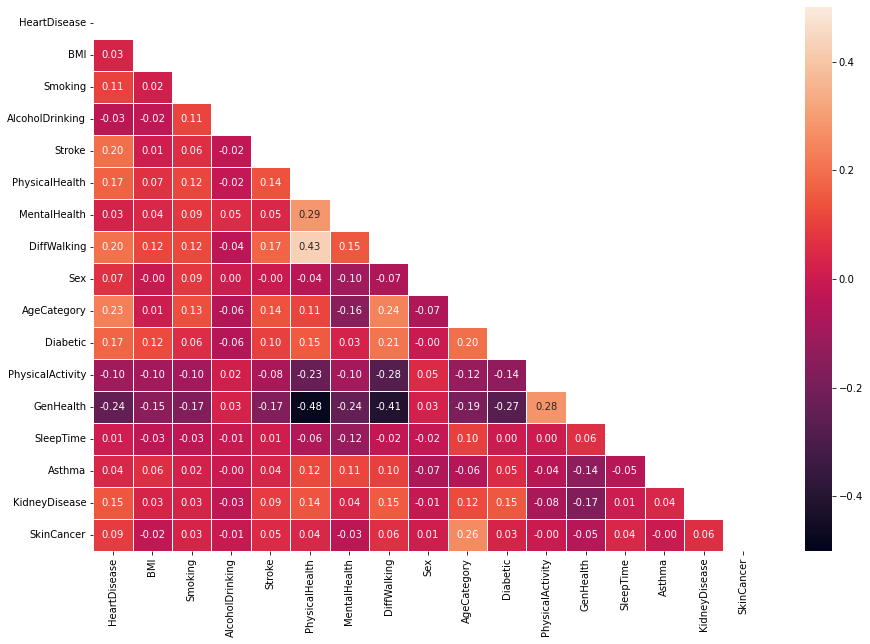

In [16]:
# Calculo de Correlaciones
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=0.5,
            vmin=-0.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=0.5)

Mostramos con más detalles algunas de las columnas ('BMI', 'PhysicalHealth', 'AgeCategory', 'SleepTime', 'GenHealth'):

Hacemos un get_dummies para no menospreciar la variable del sexo, ya que al ser únicamente 0 o 100, 0 para la mujer y 100 para el hombre, si utilizamos esta variable todo el peso recae sobre el hombre ya que es 100 y sin embargo la mujer al tener 0 queda menospreciada, llegandole menos peso del que debería. Con esto igualamos los pesos entre el hombre y la mujer.

In [18]:
sex=pd.get_dummies(df["Sex"])
#sex=pd.get_dummies(data = df[["Sex", "AlcoholDrinking"]])
sex = sex.rename(columns={0.0:'Mujer',100.0:'Hombre'})
sex

,Mujer,Hombre
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
319790,1,0
319791,0,1
319792,0,1
319793,1,0


Así se verían las variables del hombre y la mujer tras el get_dummies:

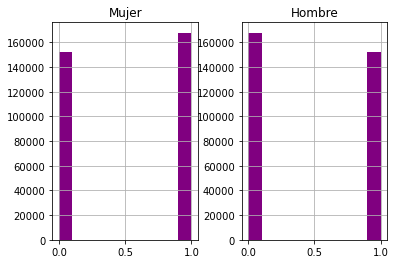

In [19]:
sex.hist(color='purple')
plt.show()

# MODELOS

In [20]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', tree.DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', xgb.XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

Mezcla todos los datos para si cogemos solo un trozo del dataframe no sean todos los datos iguales

In [21]:
df=df.sample(frac=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319795 entries, 20521 to 141383
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  float64
 3   AlcoholDrinking   319795 non-null  float64
 4   Stroke            319795 non-null  float64
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  float64
 8   Sex               319795 non-null  float64
 9   AgeCategory       319795 non-null  float64
 10  Diabetic          319795 non-null  float64
 11  PhysicalActivity  319795 non-null  float64
 12  GenHealth         319795 non-null  float64
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  float64
 15  KidneyDisease     319795 non-null  float64
 16  SkinCancer      

In [23]:
df['HeartDisease'].unique()

array([  0., 100.])

In [24]:
df['HeartDisease']=df['HeartDisease'].replace(100,1)
df['HeartDisease']=df['HeartDisease'].astype(int)

In [25]:
df['HeartDisease'].unique()

array([0, 1])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319795 entries, 20521 to 141383
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  float64
 3   AlcoholDrinking   319795 non-null  float64
 4   Stroke            319795 non-null  float64
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  float64
 8   Sex               319795 non-null  float64
 9   AgeCategory       319795 non-null  float64
 10  Diabetic          319795 non-null  float64
 11  PhysicalActivity  319795 non-null  float64
 12  GenHealth         319795 non-null  float64
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  float64
 15  KidneyDisease     319795 non-null  float64
 16  SkinCancer      

In [27]:
target = df['HeartDisease'].copy()
df.drop(['HeartDisease'], axis=1, inplace=True)

Capamos el dataframe a 10.000 datos ya que es demasiado grande y a la hora de ejecutar tarda mucho tiempo y saca unos valores parecidos en todos los casos.

In [28]:
df=df.head(10000)
target=target.head(10000)

In [29]:
print('Size of Full dataset is: {}'.format(df.shape))
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Size of Full dataset is: (10000, 16)
Number transactions X_train dataset:  (7500, 16)
Number transactions y_train dataset:  (7500,)
Number transactions X_test dataset:  (2500, 16)
Number transactions y_test dataset:  (2500,)


In [30]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation
    print(kfold)
    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i =i+ 1
#df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
df_results

KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.21,2.49,74.96,1.46
1,Random Forest,80.13,3.28,91.43,1.15
2,SVM,67.12,2.77,91.77,1.24
3,KNN,68.78,2.52,90.56,1.31
4,Decision Tree Classifier,57.39,2.91,86.21,0.74
5,Gaussian NB,81.47,2.20,84.51,1.02
6,XGboost,79.05,2.08,90.72,1.03


La tercera columna es la precisión real y la primera nos dice la precisión de la matriz real, es decir nos dice los acertados realmente en verdadero verdadero, falso falso, falso verdadero y verdadero falso

## XGBoost

XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje automático de código abierto que proporciona una implementación eficiente y efectiva del gradient boosting. El gradient boosting es una técnica de aprendizaje automático que construye un modelo de predicción a partir de un conjunto de "árboles de decisión débiles" entrenados secuencialmente, donde cada árbol corrige los errores del árbol anterior.

Cogemos los datos para el entrenamiento y el testeo tanto del dataframe como del target (este contiene únicamente valores 0 o 1).

In [31]:
X, y = df, target
X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(X, y, test_size=0.2, random_state=42)

model_XGBoost = xgb.XGBClassifier()
model_XGBoost.fit(X_train_xgboost, y_train_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Utilizamos score con los datos de testeo para ver las predicciones que saca el modelo en base al entrenamiento realizado.

In [32]:
accuracy = model_XGBoost.score(X_test_xgboost, y_test_xgboost)
#esto nos redondea el numero a 2 decimales y lo convierte en string
accuracy = format(accuracy, '.2f')
print("Precision del modelo: " + accuracy)

Precision del modelo: 0.91


## Random forest

Random Forest es un algoritmo de aprendizaje automático que construye un conjunto de árboles de decisión a partir de un conjunto de datos de entrada y los utiliza para hacer predicciones. Cada árbol es construido a partir de un subconjunto aleatorio de muestras del conjunto de datos y de un conjunto aleatorio de características. La predicción final del modelo se hace tomando el promedio de las predicciones de todos los árboles.

Partimos el dataframe para tener dos df con datos diferentes del mismo df.

In [33]:
dftest_randomForest = df.tail(5000)
df_randomForest = df.head(5000)

Realizamos el modelo del árbol, donde estaremos entrenando el objeto clf mediante el método fit que utilizamos la variable regresora X y la respuesta Y.

In [34]:
clf = tree.DecisionTreeClassifier()

X = df_randomForest[["BMI", "PhysicalHealth", "MentalHealth","SleepTime"]]
X_test = dftest_randomForest[["BMI", "PhysicalHealth", "MentalHealth","SleepTime"]]
Y = df_randomForest["AgeCategory"] > 10

Y_test = dftest_randomForest["AgeCategory"] > 10

clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

Mostramos la eficacia de la predicción sin haber entrenado el modelo.

In [35]:
np.mean(Y_test == Y_pred_test)

0.8714

Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC y clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.

In [36]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

clf.feature_importances_

array([0.64754915, 0.0952014 , 0.13188221, 0.12536723])

Mostramos la eficacia de nuestra predicción entre 1 y 0.

In [37]:
np.mean(Y_test == Y_pred_test)

0.9144

## GaussianNB

Este algoritmo es una técnica de clasificación y regresión que se basa en la teoría de la probabilidad y el teorema de Bayes para hacer predicciones a partir de un conjunto de datos de entrada.

Cogemos los datos para el entrenamiento y el testeo tanto del dataframe como del target (este contiene únicamente valores 0 o 1).

In [38]:
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

Utilizamos predict con los datos de testeo para ver las predicciones que saca el modelo en base al entrenamiento realizado.

In [39]:
y_pred = modelo.predict(X_test)
np.mean(y_test==y_pred)

0.846

# Interpretabilidad y Modelos de Interpretabilidad

Vamos ha hacer la interpretabilidad de los datos en base al modelo XGBoost, para lo cual primero vemos cada variable en base a 3 caracteristicas, el peso, el cover y el gain:

Text(0, 0.5, 'Variables')

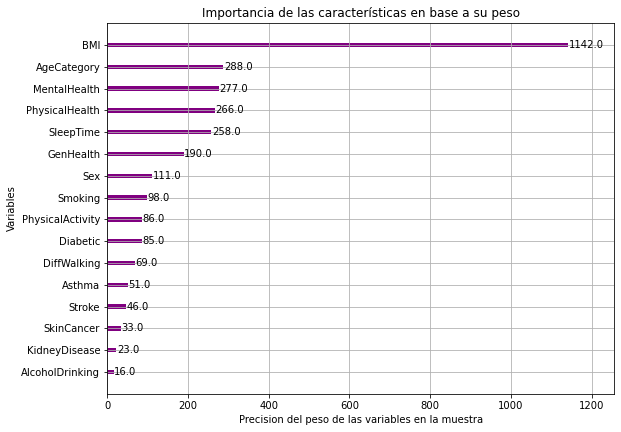

In [40]:
fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(2, 2, 1)
plot_importance(model_XGBoost, importance_type='weight', ax=ax, color='purple')
ax.set_title("Importancia de las características en base a su peso");
ax.set_xlabel('Precision del peso de las variables en la muestra')
ax.set_ylabel('Variables')

Text(0, 0.5, 'Variables')

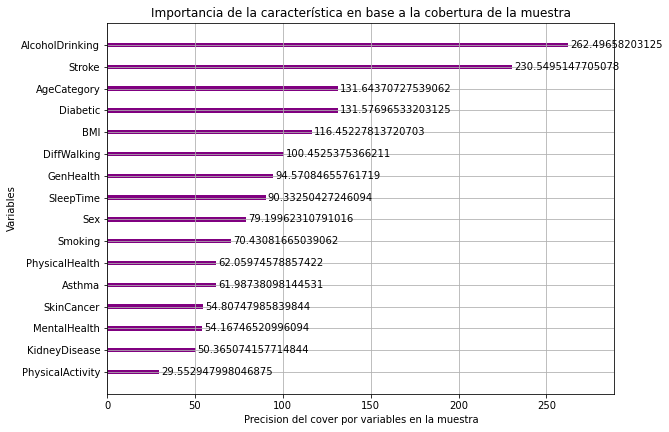

In [41]:
fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(2, 2, 1)
plot_importance(model_XGBoost, importance_type='cover', ax=ax, color='purple')
ax.set_title("Importancia de la característica en base a la cobertura de la muestra");
ax.set_xlabel('Precision del cover por variables en la muestra')
ax.set_ylabel('Variables')

Text(0, 0.5, 'Variables')

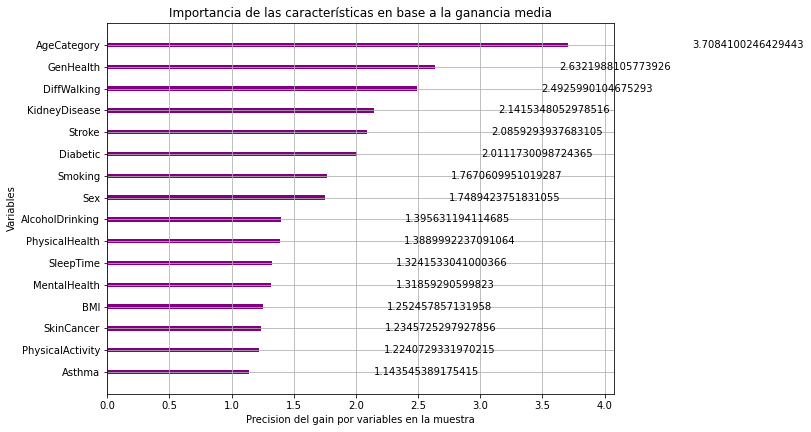

In [42]:
fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(2, 2, 1)
plot_importance(model_XGBoost, importance_type='gain', ax=ax, color='purple')
ax.set_title("Importancia de las características en base a la ganancia media");
ax.set_xlabel('Precision del gain por variables en la muestra')
ax.set_ylabel('Variables')

## ELI5

ELI5 es una librería de Python que ayuda a depurar clasificadores y regresores de aprendizaje automático y a explicar sus predicciones de forma sencilla.

Además proporciona una forma de calcular la importancia de las características para cualquier estimador de caja negra midiendo cómo disminuye la puntuación cuando una característica no está disponible; el método también se conoce como "importancia de permutación" o "Exactitud de disminución media (MDA)".

In [43]:
%%time
listaVariables = []
for a in df.columns:
    listaVariables.append(a)
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train_xgboost, y_train_xgboost, eval_metric = 'logloss')
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train_xgboost, y_train_xgboost)
eli5.show_weights(feat_permut, feature_names = listaVariables)

CPU times: total: 12.4 s
Wall time: 2.71 s


Weight,Feature
0.0436 ± 0.0013,BMI
0.0349 ± 0.0016,AgeCategory
0.0240 ± 0.0025,GenHealth
0.0197 ± 0.0012,PhysicalHealth
0.0167 ± 0.0013,SleepTime
0.0154 ± 0.0015,MentalHealth
0.0126 ± 0.0011,Smoking
0.0103 ± 0.0021,Sex
0.0092 ± 0.0011,Diabetic
0.0085 ± 0.0008,Stroke


## SHAP

SHAP (SHapley Additive exPlanations) es un método para explicar la importancia de las características en la salida de un modelo de aprendizaje automático. El modelo se basa en las teorías de juegos de coalición y el valor de Shapley, para asignar una "puntuación de importancia" a cada característica en función de su contribución a la salida del modelo.

SHAP permite una explicación global y local para una instancia específica, es decir, puede mostrar no solo qué características son importantes en general para el modelo, sino también cómo cada característica contribuye a la salida para una instancia dada. Además, SHAP es modelo-agnóstico, lo que significa que puede ser utilizado para explicar la salida de cualquier modelo de aprendizaje automático, independientemente de cómo este entrenado.

Para poder visualizar las siguientes gráficas de este modelo tenemos que habilitar javascript en shap para este notebook, lo conseguimos mediante la siguiente línea de código: 

In [44]:
#para poder visualizar:
shap.initjs()

Cargamos nuestros valores en shape para poder operar con ellos.

In [45]:
explainer = shap.TreeExplainer(model_XGBoost)
shap_values = explainer.shap_values(X_test_xgboost)
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1995,-0.592155,0.201745,0.041009,-0.051554,-0.020799,-0.121346,-0.171221,0.407216,-1.488264,-0.220184,-0.252362,-1.889507,-0.180042,-0.055211,-0.027047,-0.011398
1996,-0.088853,-0.549015,0.054563,-0.042103,-0.141716,0.062830,-0.038688,0.303729,0.516313,-0.286840,-0.116540,-0.206164,-0.076578,-0.011107,-0.008598,0.005121
1997,-0.437982,-0.190371,0.017099,-0.050142,0.539417,-0.620693,-0.188566,-0.370065,1.399422,-0.187985,-0.079934,1.344922,0.336219,-0.091743,-0.043153,0.033856
1998,-0.064376,-0.411521,0.040085,-0.061338,-0.087360,-0.122995,-0.104092,0.283019,-0.620163,-0.245291,0.027328,0.154610,0.072099,-0.028365,-0.008512,0.003899
1999,0.378215,0.320032,0.042413,-0.101280,0.283412,-0.021744,-0.058982,-0.687401,0.412983,-0.088950,0.069159,-1.482288,-0.370609,-0.036140,-0.025464,0.047107


Vemos el impacto de cada variable en el modelo:

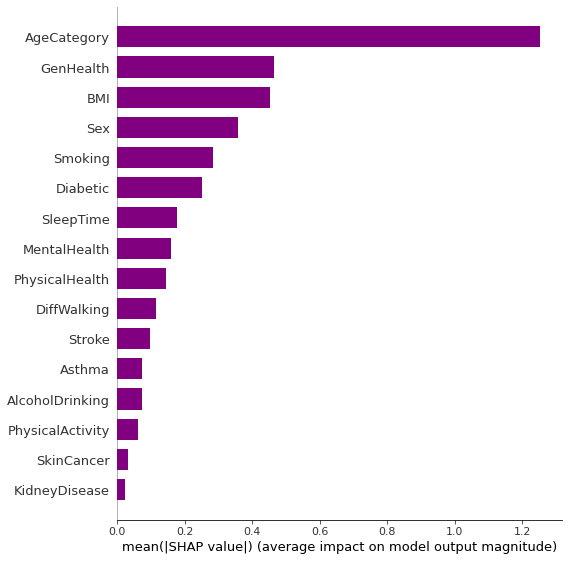

In [46]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='purple')

In [47]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Aquí podemos ver en mas detalle y pudiendo seleccionar las diferentes categorías, el peso de cada variable dentro del propio modelo, y como se afectan las variables entre sí.

In [48]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

Más formas de representar las relaciones entre las diferentes variables dentro del modelo:

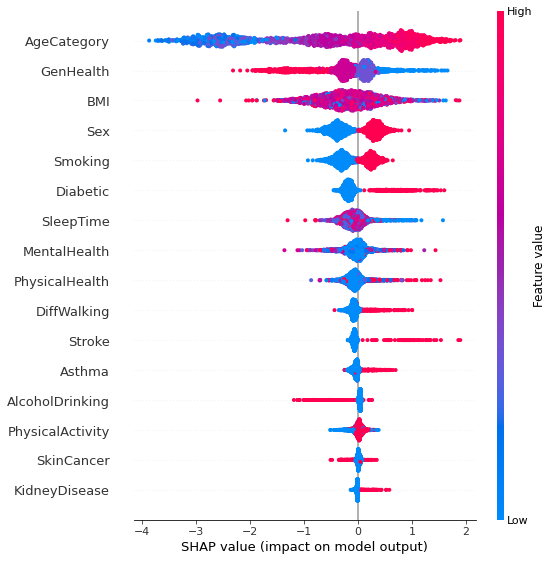

In [49]:
shap.summary_plot(shap_values, X_test)

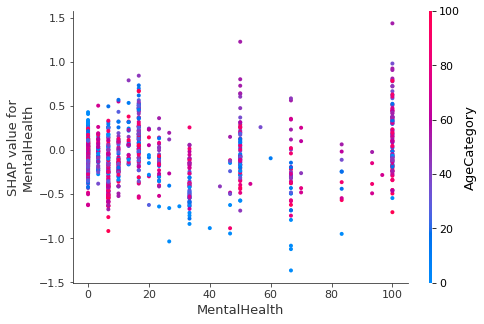

In [50]:
shap.dependence_plot(ind='MentalHealth', interaction_index='AgeCategory',
                     shap_values=shap_values, 
                     features=X_test_xgboost,  
                     display_features=X_test_xgboost)

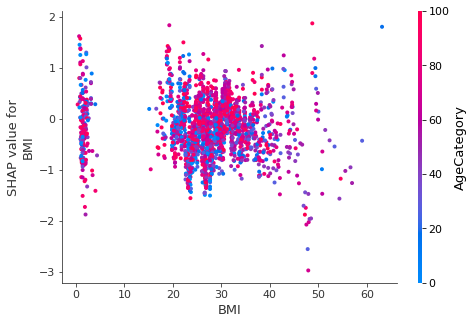

In [51]:
shap.dependence_plot(ind='BMI', interaction_index='AgeCategory',
                     shap_values=shap_values, 
                     features=X_test_xgboost,  
                     display_features=X_test_xgboost)

# Conclusiones:

Se ha realizado un tratamiento de datos relacionados con enfermedades cardíacas y se han trabajado con diferentes modelos para obtener una predicción a futuro.

Se muestra inicialmente gráficas de los datos con los que se trabajan y pequeñas modificaciones realizadas a los datos para trabajar con ellos de manera más cómoda, como por ejemplo, que todas las variables estén trabajando en un rango de valores, en nuestro caso lo hemos hecho de 0 a 100.

En esta actividad, importamos los diferentes modelos de predicción y cargando el dataframe pero sin ser muy pesado para que podamos seguir trabajando y entrenar los datos para que nos indiquen que modelo de predicción es el mejor para nuestro dataframe.

Una vez sepamos los mejores modelos de predicción para nuestro dataframe, que son el XGBoost, GaussianNB y el Random Forest, realizamos el calculo de la precisión forma manual para comprobar que el porcentaje que nos indica anteriormente coincida y asi afirmar que los tres modelos que hemos escogido tienen la misma precisión del modelo.

En el XGBoost cogemos los datos para entrenar la precisión del modelo y a parte tambien escogemos algunos métodos de interpretación ya que el XGBoost es un modelo de caja negra, es decir, que no sabemos exactamente con que datos esta trabajando y los métodos de interpretación nos ayudan a conocer las características más importantes, el efecto que tiene cada característica en una predicción concreta y en un gran número de prediciones. Algunos de los métodos de interpretación que utilizamos son el ELI5 y el SHAP, a parte de mostrar el peso, el cover y el gain de las diferenetes variables, o columnas.

En el Random Forest y en el GaussianNB solamente cogemos los datos para entrenar la precisión del modelo y ver si los resultados obtenidos son similares a los conseguidos anteriomente al comprobar que algoritmos son mejores.

Mediante modelos de interpretabilidad hemos visto como interactuan las diferentes variables de nuestro dataframe entre sí para sacar la predicción del modelo, primero sacamos el peso el cover y el gain de las variables para ver sus valores en el modelo y seguidamente hacemos un estudio de la interpretabilidad de nuestro modelo, mostrando mediante ELI5 y SHAP como se interrelacionan nuestras variables de una forma mucho mas sencilla y fácil de observar.